# Market Basket Analysis
## Using FP-growth algorithm with mlxtend Python library

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#save timestamp to check script's running time
startTime = datetime.now()

### Load and clean transactions data to be used in the analysis

In [3]:
#read transactions data from csv file
df = pd.read_excel(r'C:\Users\nadiak\Documents\UpSale\Online_Retail.xlsx')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

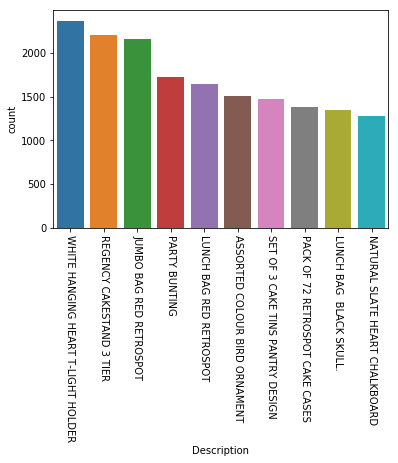

In [4]:
#plot 10 most frequent products in dataset
sns.countplot(x = 'Description', data = df, order = df['Description'].value_counts().iloc[:10].index)
plt.xticks(rotation=-90)

In [5]:
#clean the product names
df['Description'] = df['Description'].str.strip()
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

### Create basket datafarme from transactions data with each row representing one basket

In [6]:
#create basket dataframe
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#one hot encode the basket
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Run FP-growth algorithm on frequent item sets (items that frequently appear in the same basket)

In [8]:
#create minTransactions variable to represent the minimum number of baskets for support parameter
minTransaction = 300
totalTransactions = len(basket_sets.index)
min_support_calc = minTransaction/totalTransactions

print('number of baskets for analysis is', totalTransactions)
print('minimum support value is ', round(min_support_calc*100, 4), '%')

number of baskets for analysis is 24445
minimum support value is  1.2272 %


In [9]:
#create frequent items sets with clculated minimum support
frequent_itemsets = fpgrowth(basket_sets, min_support=min_support_calc, use_colnames=True)
frequent_itemsets.describe()

,support
count,712.000000
mean,0.020096
std,0.009659
min,0.012272
25%,0.014072
50%,0.016854
75%,0.022060
max,0.092452


In [10]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
479,"(REGENCY CAKESTAND 3 TIER, ROSES REGENCY TEACU...",(GREEN REGENCY TEACUP AND SAUCER),0.013541,0.041522,0.012313,0.909366,21.900927,0.011751,10.575210
492,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.024504,0.041522,0.022172,0.904841,21.791969,0.021155,10.072429
477,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...",(ROSES REGENCY TEACUP AND SAUCER),0.014031,0.043608,0.012313,0.877551,20.123579,0.011701,7.810534
466,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(GREEN REGENCY TEACUP AND SAUCER),0.016036,0.041522,0.014031,0.875000,21.073276,0.013366,7.667826
120,"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...",(RED RETROSPOT CHARLOTTE BAG),0.015504,0.042299,0.013336,0.860158,20.335174,0.012680,6.848465
491,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.025895,0.043608,0.022172,0.856240,19.634887,0.021043,6.652704
471,"(REGENCY CAKESTAND 3 TIER, PINK REGENCY TEACUP...",(ROSES REGENCY TEACUP AND SAUCER),0.016036,0.043608,0.013541,0.844388,19.363094,0.012841,6.145994
592,(REGENCY TEA PLATE GREEN),(REGENCY TEA PLATE ROSES),0.015586,0.018204,0.013050,0.837270,45.993424,0.012766,6.033294
459,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031336,0.041522,0.025895,0.826371,19.902102,0.024594,5.520258
416,"(WOODLAND CHARLOTTE BAG, CHARLOTTE BAG PINK PO...",(RED RETROSPOT CHARLOTTE BAG),0.016159,0.042299,0.013295,0.822785,19.451620,0.012612,5.404170


### Save results to csv file based on desired association parameters

In [11]:
rules[(rules['lift'] >= 1.4) & (rules['confidence'] >= 0.3)].sort_values(by=['confidence', 'lift'], ascending=False).to_excel(r'C:\Users\nadiak\Documents\UpSale\Online_Retail_Results_FPGrowth.xlsx', index=False)

In [12]:
print('It took ', datetime.now() - startTime, ' to run')

It took  0:01:06.195543  to run
